In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

C:\Users\w8462\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
x_train[1234].shape

(28, 28)

In [6]:
#CNN要的是(28,28,1)
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [7]:
x_train[1234].shape

(28, 28, 1)

In [8]:
X=x_train[1234]

In [9]:
X=X.reshape(28,28)

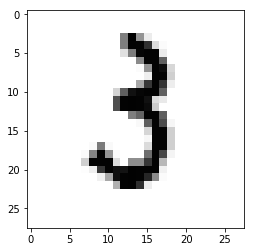

In [10]:
plt.imshow(X,cmap='Greys')

In [11]:
from keras.utils import np_utils

In [12]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [13]:
y_train[1234]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
x_train=x_train/255
x_test=x_test/255

In [15]:
#自己設計的
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras.optimizers import SGD

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(4,(5,5),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))

In [18]:
#max-pooling
model.add(MaxPool2D(pool_size=(2,2)))

In [19]:
model.add(Conv2D(8,(5,5),padding='same'))
model.add(Activation('relu'))

In [20]:
model.add(MaxPool2D(pool_size=(2,2)))

In [21]:
model.add(Conv2D(16,(5,5),padding='same'))
model.add(Activation('relu'))

In [22]:
model.add(MaxPool2D(pool_size=(2,2)))

In [23]:
model.add(Flatten()) #拉平
model.add(Dense(9))
model.add(Activation('relu'))

In [24]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [25]:
model.compile(loss='mse',optimizer=SGD(lr=0.07),metrics=['accuracy'])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          3216      
__________

In [27]:
model.fit(x_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 92us/step - loss: 0.0898 - acc: 0.1026
Epoch 2/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.0889 - acc: 0.1667
Epoch 3/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0867 - acc: 0.2798
Epoch 4/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.0758 - acc: 0.4307
Epoch 5/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0516 - acc: 0.6388
Epoch 6/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0407 - acc: 0.7153
Epoch 7/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0286 - acc: 0.8092
Epoch 8/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0211 - acc: 0.8617
Epoch 9/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0176 - acc: 0.8838
Epoch 10/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0153 - acc: 0.9002